In [1]:
import ezdxf
import numpy

# Open the DWG file
doc = ezdxf.readfile("Drawing1.dxf")

# Access the modelspace
msp = doc.modelspace()

lines = msp.query('LINE[layer=="SOL-PV MODULES"]')
# Iterate over entities in the modelspace

print (doc)

#for entity in msp:
 #   print(entity.)

In [2]:
print('Helloworld!')

Helloworld!


In [3]:
# helper function
def print_entity(e):
    print("LINE on layer: %s\n" % e.dxf.layer)
    print("start point: %s\n" % e.dxf.start)
    print("end point: %s\n" % e.dxf.end)

# iterate over all entities in modelspace
msp = doc.modelspace()
for e in msp:
    if e.dxftype() == "LINE":
        print_entity(e)

# entity query for all LINE entities in modelspace
for e in msp.query("LINE"):
    print_entity(e)

In [4]:
import ezdxf

def read_lwpolylines_from_dxf():
    """
    Reads all LWPOLYLINE entities from a DXF file named 'Drawing1.dxf'
    located in 'C:\\Users\\Mariusr\\Documents\\programming_stuff'.
    
    :return: A list of dictionaries containing information about each LWPOLYLINE
    """
    file_path = r"C:\Users\Mariusr\Documents\programming_stuff\Drawing1.dxf"
    
    try:
        # Load the DXF document
        doc = ezdxf.readfile(file_path)
        # Access the modelspace where entities are typically stored
        msp = doc.modelspace()
        
        # Initialize a list to hold information about all LWPOLYLINEs
        lwpolyline_data = []
        
        # Iterate over all LWPOLYLINE entities in the modelspace
        for lwpolyline in msp.query("LWPOLYLINE"):
            # Extract vertex data as tuples of (x, y, start_width, end_width, bulge)
            points = [(float(x), float(y)) for x, y, _, _, _ in lwpolyline]
            
            # Store the extracted information
            data = {
                "points": points,  # List of vertex tuples
                "is_closed": lwpolyline.is_closed,  # Whether the polyline is closed
                "layer": lwpolyline.dxf.layer,  # Layer of the polyline
            }
            lwpolyline_data.append(data)
        
        return lwpolyline_data
    
    except IOError:
        print("Could not read the DXF file. Please check the file path.")
        return []
    except ezdxf.DXFStructureError:
        print("Invalid DXF file structure.")
        return []

# Call the function and print the extracted LWPOLYLINE information
lwpolylines = read_lwpolylines_from_dxf()

for idx, polyline in enumerate(lwpolylines, start=1):
    print(f"LWPOLYLINE {idx}:")
    print(polyline)


LWPOLYLINE 1:
{'points': [(8733.377953525009, 150219.4658506511), (11063.18065810747, 150219.4658506511), (11063.18065810747, 151353.4658506511), (8733.377953525009, 151353.4658506511)], 'is_closed': True, 'layer': 'SOL-PV MODULES'}
LWPOLYLINE 2:
{'points': [(6383.60265824765, 150219.4658506511), (8713.405362829873, 150219.4658506511), (8713.405362829873, 151353.4658506511), (6383.60265824765, 151353.4658506511)], 'is_closed': True, 'layer': 'SOL-PV MODULES'}
LWPOLYLINE 3:
{'points': [(3254.896325861411, 150219.4658506511), (5584.699030443868, 150219.4658506511), (5584.699030443868, 151353.4658506511), (3254.896325861411, 151353.4658506511)], 'is_closed': True, 'layer': 'SOL-PV MODULES'}
LWPOLYLINE 4:
{'points': [(905.1210305840523, 150219.4658506511), (3234.923735166509, 150219.4658506511), (3234.923735166509, 151353.4658506511), (905.1210305840523, 151353.4658506511)], 'is_closed': True, 'layer': 'SOL-PV MODULES'}
LWPOLYLINE 5:
{'points': [(8733.377953525009, 151378.4658506511), (110

In [5]:
def validate_rectangle(polyline):
    """
    Validates if a polyline forms a rectangle by checking dot products of consecutive vectors.
    
    :param polyline: Dictionary containing points of the polyline.
    :return: True if it is a rectangle, False otherwise.
    """
    points = polyline["points"]  # List of (x, y) tuples

    # Ensure the polyline has exactly 4 vertices and is closed
    if len(points) != 4 or not polyline["is_closed"]:
        return False

    # Calculate vectors for consecutive points (ensure loop closure with points[0])
    vectors = [(points[i][0] - points[i - 1][0], points[i][1] - points[i - 1][1]) for i in range(4)]

    # Check dot products of consecutive vectors
    for i in range(4):
        v1 = vectors[i]
        v2 = vectors[(i + 1) % 4]  # Wrap around to check last with first
        dot_product = v1[0] * v2[0] + v1[1] * v2[1]
        
        # If the dot product is not zero, it's not a rectangle
        if dot_product != 0:
            return False

    return True

# Iterate through all LWPOLYLINEs and validate
for idx, polyline in enumerate(lwpolylines, start=1):
    is_rectangle = validate_rectangle(polyline)
    print(f"LWPOLYLINE {idx}: {'Is a rectangle' if is_rectangle else 'Not a rectangle'}")



LWPOLYLINE 1: Is a rectangle
LWPOLYLINE 2: Is a rectangle
LWPOLYLINE 3: Is a rectangle
LWPOLYLINE 4: Is a rectangle
LWPOLYLINE 5: Is a rectangle
LWPOLYLINE 6: Is a rectangle
LWPOLYLINE 7: Is a rectangle
LWPOLYLINE 8: Is a rectangle
LWPOLYLINE 9: Is a rectangle
LWPOLYLINE 10: Is a rectangle
LWPOLYLINE 11: Is a rectangle
LWPOLYLINE 12: Is a rectangle
LWPOLYLINE 13: Is a rectangle
LWPOLYLINE 14: Is a rectangle
LWPOLYLINE 15: Is a rectangle
LWPOLYLINE 16: Is a rectangle
LWPOLYLINE 17: Is a rectangle
LWPOLYLINE 18: Is a rectangle
LWPOLYLINE 19: Is a rectangle
LWPOLYLINE 20: Is a rectangle
LWPOLYLINE 21: Is a rectangle
LWPOLYLINE 22: Is a rectangle
LWPOLYLINE 23: Is a rectangle
LWPOLYLINE 24: Is a rectangle
LWPOLYLINE 25: Is a rectangle
LWPOLYLINE 26: Is a rectangle
LWPOLYLINE 27: Is a rectangle
LWPOLYLINE 28: Is a rectangle
LWPOLYLINE 29: Is a rectangle
LWPOLYLINE 30: Is a rectangle
LWPOLYLINE 31: Is a rectangle
LWPOLYLINE 32: Is a rectangle
LWPOLYLINE 33: Is a rectangle
LWPOLYLINE 34: Is a

In [24]:
def check_rectangle_properties(polyline):
    """
    Checks if a polyline rectangle is horizontal or vertical, finds its center coordinate,
    and calculates its average height and width.
    
    :param polyline: Dictionary containing points of the polyline.
    :return: A tuple (orientation, center, average_height, average_width) if valid, otherwise None.
             orientation: 'Horizontal' or 'Vertical'
             center: (x_center, y_center)
             average_height: The height of the rectangle
             average_width: The width of the rectangle
    """
    points = polyline["points"]  # List of (x, y) tuples

    # Ensure the polyline has exactly 4 vertices and is closed
    if len(points) != 4 or not polyline["is_closed"]:
        return None  # Not a valid rectangle
    
    # Find the min and max x and y coordinates
    min_x = min(point[0] for point in points)
    max_x = max(point[0] for point in points)
    min_y = min(point[1] for point in points)
    max_y = max(point[1] for point in points)
    
    # Calculate the differences
    x_diff = max_x - min_x
    y_diff = max_y - min_y
    
    # Calculate the center coordinate
    x_center = (min_x + max_x) / 2
    y_center = (min_y + max_y) / 2
    center = (x_center, y_center)

    # Calculate height and width
    average_height = y_diff
    average_width = x_diff

    # Determine orientation
    if y_diff > x_diff:
        orientation = "Vertical"
        cellcenter = (x_center,(max_y-((max_y-y_center)/2)))
    else:
        orientation = "Horizontal"
        cellcenter = (max_x-((max_x-x_center)/2),y_center)

    
    return orientation, center, average_height, average_width, cellcenter

# Iterate through all LWPOLYLINEs, validate if rectangle, and check properties
for idx, polyline in enumerate(lwpolylines, start=1):
    if validate_rectangle(polyline):  # Using the validate_rectangle function from earlier
        orientation, center, avg_height, avg_width, cellcenter = check_rectangle_properties(polyline)
        print(f"LWPOLYLINE {idx}:")
        print(f"  Orientation: {orientation}")
        print(f"  Center: {center}")
        print(f"  Average Height: {avg_height}")
        print(f"  Average Width: {avg_width}")
        print(f"  Cell center: {cellcenter}")
    else:
        print(f"LWPOLYLINE {idx}: Not a rectangle")


LWPOLYLINE 1:
  Orientation: Horizontal
  Center: (8993.158275232188, 150278.84469498473)
  Average Height: 1134.0
  Average Width: 2329.802704582462
  Cell center: (9575.608951377802, 150278.84469498473)
LWPOLYLINE 2:
  Orientation: Horizontal
  Center: (6643.382979954709, 150278.84469498473)
  Average Height: 1134.0
  Average Width: 2329.8027045822237
  Cell center: (7225.833656100265, 150278.84469498473)
LWPOLYLINE 3:
  Orientation: Horizontal
  Center: (3514.676647568587, 150278.84469498473)
  Average Height: 1134.0
  Average Width: 2329.802704582457
  Cell center: (4097.127323714201, 150278.84469498473)
LWPOLYLINE 4:
  Orientation: Horizontal
  Center: (1164.9013522912282, 150278.84469498473)
  Average Height: 1134.0
  Average Width: 2329.8027045824565
  Cell center: (1747.3520284368424, 150278.84469498473)
LWPOLYLINE 5:
  Orientation: Horizontal
  Center: (8993.158275232188, 151437.84469498473)
  Average Height: 1134.0
  Average Width: 2329.802704582462
  Cell center: (9575.60895

In [25]:
def move_polylines_to_origin(lwpolylines):
    """
    Moves all polylines in the model space to the origin by finding the smallest
    x and y coordinates across all vertices and offsetting all points accordingly.
    
    :param lwpolylines: List of polylines where each polyline is a dictionary.
    :return: Updated list of polylines with adjusted coordinates.
    """
    # Initialize global minimum x and y
    global_min_x = float('inf')
    global_min_y = float('inf')
    
    # Find global minimum x and y
    for polyline in lwpolylines:
        for point in polyline["points"]:
            global_min_x = min(global_min_x, point[0])
            global_min_y = min(global_min_y, point[1])
    
    print(f"Global minimum x: {global_min_x}, y: {global_min_y}")
    
    # Offset all points
    for polyline in lwpolylines:
        updated_points = []
        for point in polyline["points"]:
            # Subtract global minimum x and y
            updated_x = point[0] - global_min_x
            updated_y = point[1] - global_min_y
            updated_points.append((updated_x, updated_y))
        
        # Update the polyline's points
        polyline["points"] = updated_points
    
    return lwpolylines

moved_polylines = move_polylines_to_origin(lwpolylines)

# Print updated polylines
for idx, polyline in enumerate(moved_polylines, start=1):
    print(f"LWPOLYLINE {idx}:")
    print(f"  Points: {polyline['points']}")

Global minimum x: 0.0, y: 0.0
LWPOLYLINE 1:
  Points: [(7828.256922940956, 149711.84469498473), (10158.059627523418, 149711.84469498473), (10158.059627523418, 150845.84469498473), (7828.256922940956, 150845.84469498473)]
LWPOLYLINE 2:
  Points: [(5478.4816276635975, 149711.84469498473), (7808.284332245821, 149711.84469498473), (7808.284332245821, 150845.84469498473), (5478.4816276635975, 150845.84469498473)]
LWPOLYLINE 3:
  Points: [(2349.7752952773585, 149711.84469498473), (4679.5779998598155, 149711.84469498473), (4679.5779998598155, 150845.84469498473), (2349.7752952773585, 150845.84469498473)]
LWPOLYLINE 4:
  Points: [(0.0, 149711.84469498473), (2329.8027045824565, 149711.84469498473), (2329.8027045824565, 150845.84469498473), (0.0, 150845.84469498473)]
LWPOLYLINE 5:
  Points: [(7828.256922940956, 150870.84469498473), (10158.059627523418, 150870.84469498473), (10158.059627523418, 152004.84469498473), (7828.256922940956, 152004.84469498473)]
LWPOLYLINE 6:
  Points: [(5478.4816276635

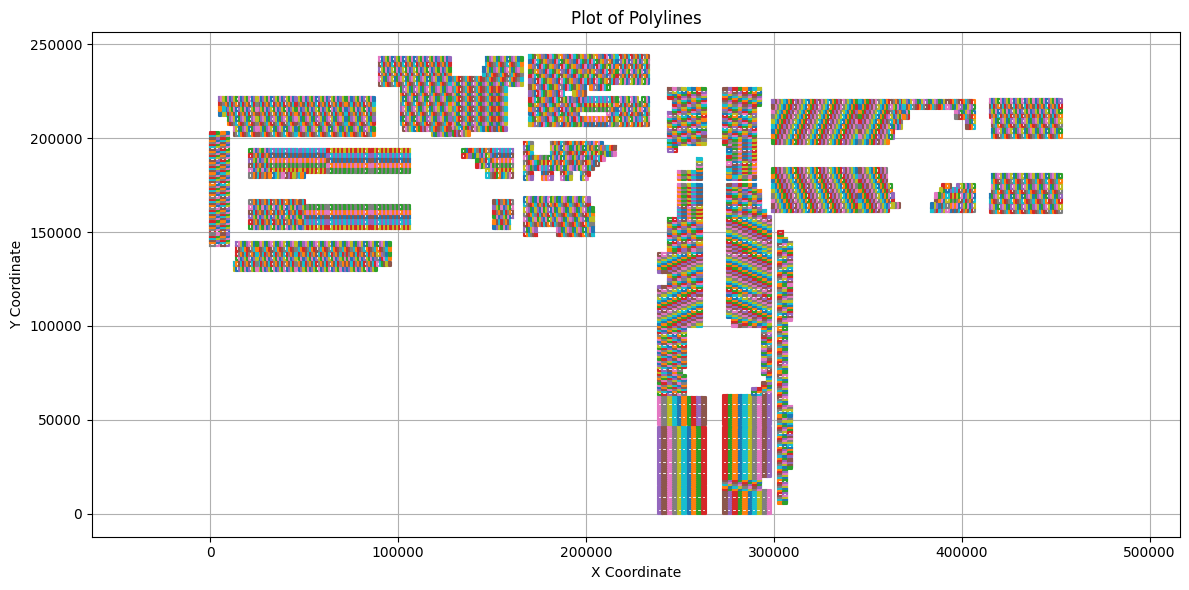

In [8]:
import matplotlib.pyplot as plt

def plot_polylines(lwpolylines):
    """
    Plots the given polylines in a 2D space.
    
    :param lwpolylines: List of polylines where each polyline is a dictionary
                        with a "points" key (list of (x, y) tuples).
    """
    plt.figure(figsize=(12, 6))  # Create a new figure

    for idx, polyline in enumerate(lwpolylines, start=1):
        # Extract points from the polyline
        points = polyline["points"]
        x_coords, y_coords = zip(*points)  # Separate x and y coordinates
        
        # Close the polyline if it's closed
        if polyline["is_closed"]:
            x_coords = x_coords + (x_coords[0],)  # Add the first x coordinate at the end
            y_coords = y_coords + (y_coords[0],)  # Add the first y coordinate at the end
        
        # Plot the polyline
        plt.plot(x_coords, y_coords, marker="o",markersize="0.002", label=f"Polyline {idx}")

    # Add labels, title, and grid
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.title("Plot of Polylines")
    plt.grid(True)
    plt.axis("equal")  # Equal scaling for both axes

    # Adjust legend position
    # plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0.)
    
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()


plot_polylines(moved_polylines)


In [29]:
def column_index_to_label(index):
    """
    Converts a numeric column index (0-based) to an Excel-style column label.
    For example, 0 -> 'A', 25 -> 'Z', 26 -> 'AA'.
    """
    label = ""
    while index >= 0:
        label = chr(index % 26 + ord('A')) + label
        index = index // 26 - 1
    return label

def find_grid_cell(cellcenter, grid_origin, cell_width, cell_height, grid_rows, grid_columns, orientation):
    """
    Finds the grid cell where the given cellcenter falls, and also returns the adjacent cell
    based on the orientation of the rectangle (horizontal or vertical).
    
    :param cellcenter: Tuple of (x, y) coordinates for the center.
    :param grid_origin: Tuple of (x, y) coordinates for the grid's bottom-left corner.
    :param cell_width: Width of each grid cell.
    :param cell_height: Height of each grid cell.
    :param grid_rows: Total number of rows in the grid.
    :param grid_columns: Total number of columns in the grid.
    :param orientation: The orientation of the rectangle ('Horizontal' or 'Vertical').
    :return: A tuple (current_cell, adjacent_cell) if within the grid, else None.
             For horizontal rectangles, adjacent_cell is below; for vertical, it's to the right.
    """
    x_center, y_center = cellcenter
    x_origin, y_origin = grid_origin

    # Determine column and row indices based on the cellcenter
    col_idx = int((x_center - x_origin) // cell_width)
    row_idx = int((y_center - y_origin) // cell_height)

    # Check if the indices are within the grid bounds
    if 0 <= col_idx < grid_columns and 0 <= row_idx < grid_rows:
        # Get the column label using the column index
        column_label = column_index_to_label(col_idx)
        # Excel-style row is 1-based (e.g., 1 for the first row, 2 for the second row)
        row_label = row_idx + 1  # Row starts at 1, not 0

        # Current cell is the one where the cellcenter falls
        current_cell = f"{column_label}{row_label}"
        
        # Based on the orientation, find the adjacent cell
        if orientation == "Horizontal":
            # For horizontal rectangles, the adjacent cell is directly below
            if row_idx + 1 < grid_rows:
                adjacent_cell = f"{column_label}{row_label + 1}"
            else:
                adjacent_cell = None  # No cell below if it's at the edge of the grid
        elif orientation == "Vertical":
            # For vertical rectangles, the adjacent cell is directly to the right
            if col_idx + 1 < grid_columns:
                adjacent_column_label = column_index_to_label(col_idx + 1)
                adjacent_cell = f"{adjacent_column_label}{row_label}"
            else:
                adjacent_cell = None  # No cell to the right if it's at the edge of the grid
        
        return current_cell, adjacent_cell
    else:
        return None, None  # Cellcenter is out of grid bounds




In [31]:
# Assuming you already have the function definitions for `check_rectangle_properties`, `column_index_to_label`, and `find_grid_cell`

# Grid parameters
grid_origin = (0, 0)  # Bottom-left corner of the grid (adjust as needed)
cell_width = 1150      # Width of each grid cell
cell_height = 1150      # Height of each grid cell
grid_rows = 1000        # Total number of rows
grid_columns = 1000     # Total number of columns

# Example of how to process the polylines
for idx, polyline in enumerate(lwpolylines, start=1):
    # Assuming check_rectangle_properties returns (orientation, center, average_height, average_width, cellcenter)
    properties = check_rectangle_properties(polyline)
    
    if properties:
        orientation, center, avg_height, avg_width, cellcenter = properties
        # Get the grid cell for the cellcenter
        grid_cell = find_grid_cell(cellcenter, grid_origin, cell_width, cell_height, grid_rows, grid_columns, orientation)
        
        if grid_cell:
            #print(f"LWPOLYLINE {idx}:")
            print(f"  Orientation: {orientation}")
            #print(f"  Center: {center}")
            #print(f"  Average Height: {avg_height}")
            #print(f"  Average Width: {avg_width}")
            #print(f"  Cellcenter: {cellcenter}")
            print(f"  Falls within grid cell: {grid_cell}")
        else:
            print(f"LWPOLYLINE {idx}: Cellcenter {cellcenter} is out of grid bounds.")
    else:
        print(f"LWPOLYLINE {idx}: Not a rectangle")


  Orientation: Horizontal
  Falls within grid cell: ('I131', 'I132')
  Orientation: Horizontal
  Falls within grid cell: ('G131', 'G132')
  Orientation: Horizontal
  Falls within grid cell: ('D131', 'D132')
  Orientation: Horizontal
  Falls within grid cell: ('B131', 'B132')
  Orientation: Horizontal
  Falls within grid cell: ('I132', 'I133')
  Orientation: Horizontal
  Falls within grid cell: ('G132', 'G133')
  Orientation: Horizontal
  Falls within grid cell: ('D132', 'D133')
  Orientation: Horizontal
  Falls within grid cell: ('B132', 'B133')
  Orientation: Horizontal
  Falls within grid cell: ('I133', 'I134')
  Orientation: Horizontal
  Falls within grid cell: ('G133', 'G134')
  Orientation: Horizontal
  Falls within grid cell: ('D133', 'D134')
  Orientation: Horizontal
  Falls within grid cell: ('B133', 'B134')
  Orientation: Horizontal
  Falls within grid cell: ('I134', 'I135')
  Orientation: Horizontal
  Falls within grid cell: ('G134', 'G135')
  Orientation: Horizontal
  Falls 